In [2]:
import torch
import fastai
import gradio as gr
from fastai.vision.all import *

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [6]:
mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
                  get_items=get_image_files, 
                  splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
                  get_y=parent_label)

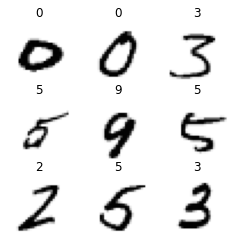

In [7]:
dls = mnist.dataloaders(path, batch_size=64, num_workers=0)
dls.show_batch(max_n=9, figsize=(4,4))

torch.Size([1, 28, 28])
TensorCategory(7, device='cuda:0')


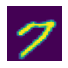

In [8]:
random_sample = next(iter(dls[1]))
x = random_sample[0][0]
y = random_sample[1][0]

print(x.shape)
print(y)
show_image(x)

In [8]:
simple_net = nn.Sequential(
    Flatten(),
    nn.Linear(28*28,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.Softmax(dim=1),
)

In [9]:
learn = Learner(dls, simple_net.to(device), opt_func=SGD, metrics=accuracy)

SuggestedLRs(valley=0.12022644281387329)

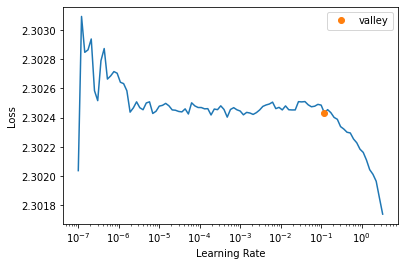

In [10]:
learn.lr_find()

In [11]:
learn.fit(10, lr=1)

epoch,train_loss,valid_loss,accuracy,time
0,1.540030,1.523635,0.938100,01:18
1,1.514748,1.510022,0.952200,01:12
2,1.508358,1.513757,0.948100,01:11
3,1.503373,1.500879,0.960100,01:11
4,1.502775,1.504259,0.956700,01:13
5,1.492376,1.496104,0.965100,01:11
6,1.491070,1.498677,0.962300,01:11
7,1.491581,1.494274,0.966900,01:12
8,1.493270,1.498188,0.962100,01:14
9,1.489006,1.490269,0.970800,01:12


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)
interp.most_confused(min_val=10)

In [ ]:
interp.plot_top_losses(6, figsize=(10,10))

In [ ]:
learn.show_results()

In [ ]:
learn.recorder.plot_loss()

In [ ]:
labels = learn.dls.vocab
def classify(img):
    pred, pred_idx, probs = learn.predict(img)
    # probs = torch.softmax(tensor(probs), dim=0)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}


interface = gr.Interface(fn=classify, inputs="sketchpad", outputs=gr.outputs.Label(num_top_classes = 5), live=True)
interface.launch(debug=True)